Highlighter 

In [2]:
from highlight import HighlightHead
import torch
import pandas as pd
from transformers import AutoTokenizer

model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def split_mask(text, highlights, max_len):
    ids = []
    mod_highlights = []
    attention_mask = []

    for i, word in enumerate(text):
        encoded_input = tokenizer(word, add_special_tokens=False)['input_ids']
        ids.extend(encoded_input)
        mod_highlights.extend([highlights[i]] * len(encoded_input))

    ids = [[101] + ids + [102]]
    mod_highlights = [0] + mod_highlights + [0]
    attention_mask = [[1] * len(ids[0])]
    
    pad_len = max_len - len(ids[0])
    
    ids[0].extend([0] * pad_len)
    mod_highlights.extend([0] * pad_len)
    attention_mask[0].extend([0] * pad_len)

    return (torch.tensor(ids), torch.tensor(mod_highlights, dtype=torch.long), torch.tensor(attention_mask))

model = HighlightHead(outdim=4, model_name=model_name)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

df = pd.read_pickle("data.pkl")
df = df.transpose()

total_loss = 0
total_runs = 0
loss_at_each = []

for epoch in range(2):
    for i in range(df.shape[1]):
        optimizer.zero_grad()
        texts, highlights, attention_mask = split_mask(df[i][0], df[i][1], tokenizer.model_max_length)
        guess, loss = model(texts, highlights, attention_mask)
        print(torch.exp(guess))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(texts[0])
        total_runs += len(texts[0])
        loss_at_each.append(loss.item())
        
        print(epoch, i)
        
print(total_loss/total_runs)
    

tensor([[-1.4165, -0.7554, -1.8313, -2.0603],
        [-1.5186, -1.6330, -1.3217, -1.1427],
        [-1.0806, -1.2102, -1.9089, -1.5407],
        ...,
        [-0.9780, -1.4634, -1.5135, -1.7583],
        [-1.0787, -1.2894, -1.6087, -1.6907],
        [-1.3658, -1.5391, -1.4134, -1.2485]], grad_fn=<LogSoftmaxBackward0>)
tensor([   0,    0,    0,    0,    0,    0,    0,    0, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -

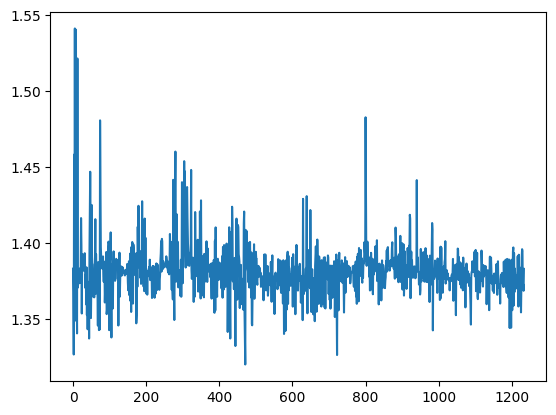

In [3]:
import matplotlib.pyplot as plt

plt.plot(loss_at_each)
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv("data.csv", header=None)
display(df)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'